In [1]:
import pandas as pd

In [48]:
# sampleのデータファイルを読む
sample_data = pd.read_table("./gdc_sample_sheet.2023-12-08_rnaseq.tsv", sep="\t")
sample_data

,File ID,File Name,Data Category,Data Type,Project ID,Case ID,Sample ID,Sample Type
0,0d140db1-dc0d-431d-b389-846d05bbb827,d0ee5ff7-a49a-4633-93a6-40c9e29fb0b7.rna_seq.a...,Transcriptome Profiling,Gene Expression Quantification,TCGA-BRCA,TCGA-E9-A1RH,TCGA-E9-A1RH-01A,Primary Tumor
1,800ca72f-4bd7-46d7-904b-bcda2fa3500c,c58a5583-7b04-4b67-9372-e161e18d7de1.rna_seq.a...,Transcriptome Profiling,Gene Expression Quantification,TCGA-BRCA,TCGA-C8-A26W,TCGA-C8-A26W-01A,Primary Tumor
2,958813f4-8036-42f7-856d-7a69c4175adc,269c35f0-a4f7-4e30-a69f-f1f3b7b5dace.rna_seq.a...,Transcriptome Profiling,Gene Expression Quantification,TCGA-BRCA,TCGA-E9-A1RH,TCGA-E9-A1RH-11A,Solid Tissue Normal
3,c7646bc5-436b-4ad5-b5ae-894b2e843cda,158ab1d9-8925-4a05-95da-b2e0ca297474.rna_seq.a...,Transcriptome Profiling,Gene Expression Quantification,TCGA-BRCA,TCGA-AO-A0JJ,TCGA-AO-A0JJ-01A,Primary Tumor
4,90e074a0-ca6d-4031-aa26-f79e5c662ba7,9c2ed2bb-8ee1-441e-9f3b-ffbb4def2673.rna_seq.a...,Transcriptome Profiling,Gene Expression Quantification,TCGA-BRCA,TCGA-BH-A0HO,TCGA-BH-A0HO-01A,Primary Tumor
...,...,...,...,...,...,...,...,...
1226,8c884351-1c8b-47ff-8bef-1a4f25f645fb,d5a1a331-cd5b-448f-adf6-ea393565ef26.rna_seq.a...,Transcriptome Profiling,Gene Expression Quantification,TCGA-BRCA,TCGA-BH-A0AU,TCGA-BH-A0AU-01A,Primary Tumor
1227,575ef8e2-dfbc-48b3-9836-089b94498e09,9dffaff8-a482-4940-b53a-527e5a510740.rna_seq.a...,Transcriptome Profiling,Gene Expression Quantification,TCGA-BRCA,TCGA-A8-A09G,TCGA-A8-A09G-01A,Primary Tumor
1228,ada5cdcf-f9e0-4209-aa92-ac3b921bbdf4,7e48e080-0ec9-4589-ba1d-6f7a1f60a010.rna_seq.a...,Transcriptome Profiling,Gene Expression Quantification,TCGA-BRCA,TCGA-E2-A14X,TCGA-E2-A14X-01A,Primary Tumor
1229,18340589-696e-4f56-80c2-dc7d7428c471,2b00c53b-e257-4305-a0cc-3dfa9ac10d12.rna_seq.a...,Transcriptome Profiling,Gene Expression Quantification,TCGA-BRCA,TCGA-HN-A2OB,TCGA-HN-A2OB-01A,Primary Tumor


In [139]:
# base_dataを作成する
case_id = sample_data.loc[0, "Sample ID"]
file_id = sample_data.loc[0, "File ID"]
file_name = sample_data.loc[0, "File Name"]
f_path = "./RNAseq/" + file_id + "/" + file_name
print(f_path)
# RNAseqのデータを読む
example_data = pd.read_table(f_path, sep="\t", header=1, index_col=0)
data = example_data.iloc[4:,]
data = pd.DataFrame(data["tpm_unstranded"])
base_data = data.rename(columns = {"tpm_unstranded":file_name})
base_data

./RNAseq/0d140db1-dc0d-431d-b389-846d05bbb827/d0ee5ff7-a49a-4633-93a6-40c9e29fb0b7.rna_seq.augmented_star_gene_counts.tsv


,d0ee5ff7-a49a-4633-93a6-40c9e29fb0b7.rna_seq.augmented_star_gene_counts.tsv
gene_id,
ENSG00000000003.15,3.6813
ENSG00000000005.6,0.0000
ENSG00000000419.13,266.0582
ENSG00000000457.14,4.9494
ENSG00000000460.17,5.9998
...,...
ENSG00000288669.1,0.0000
ENSG00000288670.1,6.4743
ENSG00000288671.1,0.0000


In [140]:
for i in range(1,1231):
    case_id = sample_data.loc[i, "Sample ID"]
    print(case_id)
    file_id = sample_data.loc[i, "File ID"]
    file_name = sample_data.loc[i, "File Name"]
    f_path = "./RNAseq/" + file_id + "/" + file_name
#     print(f_path)
    # RNAseqのデータを読む
    read_data = pd.read_table(f_path, sep="\t", header=1, index_col=0)
    data = read_data.iloc[4:,]
    data = pd.DataFrame(data["tpm_unstranded"])
    data= data.rename(columns = {"tpm_unstranded":file_name})
    base_data = base_data.join(data)
#     print(base_data)

TCGA-C8-A26W-01A
TCGA-E9-A1RH-11A
TCGA-AO-A0JJ-01A
TCGA-BH-A0HO-01A
TCGA-BH-A18F-01A
TCGA-C8-A12O-01A
TCGA-AQ-A04H-01B
TCGA-BH-A0HY-01A
TCGA-B6-A40B-01A
TCGA-AO-A125-01A
TCGA-BH-A42U-01A
TCGA-AN-A041-01A
TCGA-AN-A04D-01A
TCGA-S3-AA17-01A
TCGA-BH-A0BA-01A
TCGA-B6-A0I2-01A
TCGA-A8-A08T-01A
TCGA-E9-A2JS-01A
TCGA-E2-A150-01A
TCGA-BH-A1ET-01A
TCGA-BH-A1ET-11B
TCGA-E9-A227-01A
TCGA-A7-A4SD-01A
TCGA-C8-A132-01A
TCGA-BH-A0E2-01A
TCGA-AO-A03R-01A
TCGA-C8-A1HM-01A
TCGA-A8-A08L-01A
TCGA-AN-A0FV-01A
TCGA-AN-A0FK-01A
TCGA-AC-A3W6-01A
TCGA-A2-A0EM-01A
TCGA-AR-A2LK-01A
TCGA-AR-A24N-01A
TCGA-D8-A73X-01A
TCGA-A2-A04U-01A
TCGA-BH-A0HK-01A
TCGA-BH-A0HK-11A
TCGA-B6-A0X4-01A
TCGA-E2-A154-01A
TCGA-OL-A5DA-01A
TCGA-BH-A0H5-01A
TCGA-LQ-A4E4-01A
TCGA-BH-A0H5-11A
TCGA-A8-A09R-01A
TCGA-BH-A18J-01A
TCGA-AO-A126-01A
TCGA-A8-A09V-01A
TCGA-5L-AAT0-01A
TCGA-AC-A3YJ-01A
TCGA-A7-A13D-01A
TCGA-BH-A18H-01A
TCGA-E2-A14P-01A
TCGA-AN-A04A-01A
TCGA-A8-A085-01A
TCGA-A2-A25D-01A
TCGA-AR-A5QP-01A
TCGA-E9-A1N8-01A
TCGA-AR-A24V-0

TCGA-A2-A0SY-01A
TCGA-GM-A3XG-01A
TCGA-BH-A1ES-06A
TCGA-AR-A24S-01A
TCGA-BH-A1ES-01A
TCGA-AC-A2BK-01A
TCGA-BH-A0BV-01A
TCGA-AR-A0U4-01A
TCGA-E2-A1B5-01A
TCGA-C8-A12X-01A
TCGA-A2-A0YI-01A
TCGA-AC-A6IX-06A
TCGA-BH-A0DT-11A
TCGA-D8-A1XA-01A
TCGA-BH-A0DT-01A
TCGA-PL-A8LY-01A
TCGA-E2-A1B0-01A
TCGA-A7-A3RF-01A
TCGA-A2-A0ER-01A
TCGA-E2-A10C-01A
TCGA-A7-A0CH-01A
TCGA-BH-A1EW-01A
TCGA-BH-A1EW-11B
TCGA-AN-A04C-01A
TCGA-A7-A0CE-11A
TCGA-BH-A18N-01A
TCGA-BH-A1F2-11A
TCGA-C8-A12W-01A
TCGA-AR-A24W-01A
TCGA-A7-A13G-11A
TCGA-A7-A13G-01A
TCGA-C8-A12K-01A
TCGA-A7-A13G-01B
TCGA-E9-A1N4-01A
TCGA-BH-A18V-11A
TCGA-BH-A18V-06A
TCGA-BH-A0E6-01A
TCGA-D8-A1XS-01A
TCGA-A7-A26J-01A
TCGA-BH-A42T-01A
TCGA-HN-A2NL-01A
TCGA-AC-A2FB-11A
TCGA-A2-A0T1-01A
TCGA-GM-A3XL-01A
TCGA-A7-A26E-01A
TCGA-B6-A0IQ-01A
TCGA-A2-A0D1-01A
TCGA-A2-A0T3-01A
TCGA-AO-A03U-01B
TCGA-BH-A1EY-01A
TCGA-A1-A0SQ-01A
TCGA-E2-A1LL-01A
TCGA-S3-AA12-01A
TCGA-A7-A13F-11A
TCGA-E2-A15J-01A
TCGA-B6-A0IJ-01A
TCGA-BH-A18U-01A
TCGA-AN-A0FY-01A
TCGA-BH-A0E0-1

TCGA-AC-A6NO-01A
TCGA-B6-A0RL-01A
TCGA-E9-A1NG-11A
TCGA-E2-A15H-01A
TCGA-BH-A0DO-11A
TCGA-C8-A8HP-01A
TCGA-A7-A426-01A
TCGA-BH-A0B8-11A
TCGA-E2-A159-01A
TCGA-BH-A1FG-11B
TCGA-BH-A0E7-01A
TCGA-A8-A08Z-01A
TCGA-A8-A096-01A
TCGA-AO-A0JL-01A
TCGA-B6-A400-01A
TCGA-E2-A1BC-01A
TCGA-BH-A18Q-11A
TCGA-E2-A1B4-01A
TCGA-C8-A8HR-01A
TCGA-E9-A226-01A
TCGA-E2-A10E-01A
TCGA-D8-A27H-01A
TCGA-BH-A0BO-01A
TCGA-BH-A0DG-01A
TCGA-E9-A1R7-11A
TCGA-BH-A0DG-11A
TCGA-BH-A0HW-01A
TCGA-BH-A1FN-01A
TCGA-GM-A3NW-01A
TCGA-A8-A09X-01A
TCGA-BH-A208-11A
TCGA-BH-A208-01A
TCGA-A2-A0YH-01A
TCGA-D8-A3Z6-01A
TCGA-D8-A1JI-01A
TCGA-C8-A26Y-01A
TCGA-BH-A0DL-11A
TCGA-EW-A1J3-01A
TCGA-GM-A3NY-01A
TCGA-AQ-A04L-01B
TCGA-E2-A153-01A
TCGA-BH-A0C3-11A
TCGA-A2-A1G1-01A
TCGA-OL-A66H-01A
TCGA-BH-A18S-01A
TCGA-C8-A12L-01A
TCGA-D8-A13Z-01A
TCGA-BH-A42V-01A
TCGA-A2-A4RY-01A
TCGA-E9-A1RC-01A
TCGA-BH-A0B9-01A
TCGA-B6-A0I1-01A
TCGA-EW-A1IW-01A
TCGA-D8-A1XF-01A
TCGA-B6-A0X7-01A
TCGA-A2-A0EN-01A
TCGA-A7-A13E-01A
TCGA-A7-A13E-01B
TCGA-A7-A13E-1

In [142]:
base_data.to_csv("BRCA_TPM.csv")

In [123]:
example_data

,gene_name,gene_type,unstranded,stranded_first,stranded_second,tpm_unstranded,fpkm_unstranded,fpkm_uq_unstranded
gene_id,,,,,,,,
N_unmapped,NaN,NaN,1995048,1995048,1995048,NaN,NaN,NaN
N_multimapping,NaN,NaN,5623348,5623348,5623348,NaN,NaN,NaN
N_noFeature,NaN,NaN,2421837,39560101,39644537,NaN,NaN,NaN
N_ambiguous,NaN,NaN,6923560,1600411,1605458,NaN,NaN,NaN
ENSG00000000003.15,TSPAN6,protein_coding,324,170,154,3.6813,1.0276,1.1303
...,...,...,...,...,...,...,...,...
ENSG00000288669.1,AC008763.4,protein_coding,0,0,0,0.0000,0.0000,0.0000
ENSG00000288670.1,AL592295.6,lncRNA,227,126,111,6.4743,1.8073,1.9878
ENSG00000288671.1,AC006486.3,protein_coding,0,0,0,0.0000,0.0000,0.0000


In [125]:
meta_data = example_data.iloc[4:,]

In [127]:
gene_name = pd.DataFrame(meta_data["gene_name"])


In [152]:
gene_name_exp = gene_name.join(base_data)

In [153]:
gene_name_exp

,gene_name,d0ee5ff7-a49a-4633-93a6-40c9e29fb0b7.rna_seq.augmented_star_gene_counts.tsv,c58a5583-7b04-4b67-9372-e161e18d7de1.rna_seq.augmented_star_gene_counts.tsv,269c35f0-a4f7-4e30-a69f-f1f3b7b5dace.rna_seq.augmented_star_gene_counts.tsv,158ab1d9-8925-4a05-95da-b2e0ca297474.rna_seq.augmented_star_gene_counts.tsv,9c2ed2bb-8ee1-441e-9f3b-ffbb4def2673.rna_seq.augmented_star_gene_counts.tsv,11ed8e05-8f30-460a-b502-01ae09504315.rna_seq.augmented_star_gene_counts.tsv,0d6fbefe-4e21-4762-a476-9c899d4a94b7.rna_seq.augmented_star_gene_counts.tsv,be813beb-9b35-4063-9d61-9f49a7fd7706.rna_seq.augmented_star_gene_counts.tsv,01661d94-fc16-4456-95cf-a5fa4e1e196c.rna_seq.augmented_star_gene_counts.tsv,...,23f366c0-41f3-4159-86f0-5fa3d0059761.rna_seq.augmented_star_gene_counts.tsv,281a89c1-e817-49d4-afa1-2894c2747919.rna_seq.augmented_star_gene_counts.tsv,4c915c9f-4e60-48d4-a4c5-7d055940b65f.rna_seq.augmented_star_gene_counts.tsv,5ea12b9b-56ac-4d0c-8761-bf172b2f23e0.rna_seq.augmented_star_gene_counts.tsv,ca34cd1c-026e-4641-a9dd-ac1a9b4f243b.rna_seq.augmented_star_gene_counts.tsv,d5a1a331-cd5b-448f-adf6-ea393565ef26.rna_seq.augmented_star_gene_counts.tsv,9dffaff8-a482-4940-b53a-527e5a510740.rna_seq.augmented_star_gene_counts.tsv,7e48e080-0ec9-4589-ba1d-6f7a1f60a010.rna_seq.augmented_star_gene_counts.tsv,2b00c53b-e257-4305-a0cc-3dfa9ac10d12.rna_seq.augmented_star_gene_counts.tsv,92b7faad-a817-4464-a074-9b64bf25fad5.rna_seq.augmented_star_gene_counts.tsv
gene_id,,,,,,,,,,,,,,,,,,,,,
ENSG00000000003.15,TSPAN6,3.6813,44.5418,34.0830,47.7993,3.2825,37.4453,59.6945,13.3861,17.6389,...,22.7796,37.2234,26.5987,36.6111,28.9446,24.9401,25.4567,53.7850,74.5828,5.9777
ENSG00000000005.6,TNMD,0.0000,0.4196,22.5726,7.1281,0.3109,30.4045,0.1715,0.0379,1.0668,...,4.2814,0.3765,1.1714,2.7710,0.1616,2.7710,1.0861,0.4618,2.4191,0.0000
ENSG00000000419.13,DPM1,266.0582,127.3297,57.6085,89.6434,86.0985,109.9680,136.8148,202.8470,103.1530,...,83.4911,89.7803,94.3546,207.3451,91.7335,144.7579,110.5197,101.4235,69.4501,155.6594
ENSG00000000457.14,SCYL3,4.9494,12.5416,6.5378,13.8786,15.5649,19.6059,9.2418,10.3827,20.2070,...,14.4749,9.1166,11.0743,13.6772,14.7696,16.5904,22.0203,16.7457,13.7114,11.4106
ENSG00000000460.17,C1orf112,5.9998,10.4218,1.5583,5.7376,3.8180,11.8788,5.2480,4.8088,10.5009,...,5.5403,4.7628,6.3336,17.2336,5.5829,7.4400,7.7628,7.0168,4.0234,5.4989
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000288669.1,AC008763.4,0.0000,0.0119,0.0109,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
ENSG00000288670.1,AL592295.6,6.4743,11.6266,15.6602,10.5200,12.1624,20.7178,19.8605,17.5599,25.5276,...,19.0856,7.7397,12.6882,11.0049,7.4572,25.0784,9.5975,13.3401,12.2149,7.8476
ENSG00000288671.1,AC006486.3,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


In [154]:
gene_name_exp.set_index("gene_name", inplace=True) 

In [155]:
gene_name_exp

,d0ee5ff7-a49a-4633-93a6-40c9e29fb0b7.rna_seq.augmented_star_gene_counts.tsv,c58a5583-7b04-4b67-9372-e161e18d7de1.rna_seq.augmented_star_gene_counts.tsv,269c35f0-a4f7-4e30-a69f-f1f3b7b5dace.rna_seq.augmented_star_gene_counts.tsv,158ab1d9-8925-4a05-95da-b2e0ca297474.rna_seq.augmented_star_gene_counts.tsv,9c2ed2bb-8ee1-441e-9f3b-ffbb4def2673.rna_seq.augmented_star_gene_counts.tsv,11ed8e05-8f30-460a-b502-01ae09504315.rna_seq.augmented_star_gene_counts.tsv,0d6fbefe-4e21-4762-a476-9c899d4a94b7.rna_seq.augmented_star_gene_counts.tsv,be813beb-9b35-4063-9d61-9f49a7fd7706.rna_seq.augmented_star_gene_counts.tsv,01661d94-fc16-4456-95cf-a5fa4e1e196c.rna_seq.augmented_star_gene_counts.tsv,e862a544-f553-47fa-ba8b-675e0ce7c5bd.rna_seq.augmented_star_gene_counts.tsv,...,23f366c0-41f3-4159-86f0-5fa3d0059761.rna_seq.augmented_star_gene_counts.tsv,281a89c1-e817-49d4-afa1-2894c2747919.rna_seq.augmented_star_gene_counts.tsv,4c915c9f-4e60-48d4-a4c5-7d055940b65f.rna_seq.augmented_star_gene_counts.tsv,5ea12b9b-56ac-4d0c-8761-bf172b2f23e0.rna_seq.augmented_star_gene_counts.tsv,ca34cd1c-026e-4641-a9dd-ac1a9b4f243b.rna_seq.augmented_star_gene_counts.tsv,d5a1a331-cd5b-448f-adf6-ea393565ef26.rna_seq.augmented_star_gene_counts.tsv,9dffaff8-a482-4940-b53a-527e5a510740.rna_seq.augmented_star_gene_counts.tsv,7e48e080-0ec9-4589-ba1d-6f7a1f60a010.rna_seq.augmented_star_gene_counts.tsv,2b00c53b-e257-4305-a0cc-3dfa9ac10d12.rna_seq.augmented_star_gene_counts.tsv,92b7faad-a817-4464-a074-9b64bf25fad5.rna_seq.augmented_star_gene_counts.tsv
gene_name,,,,,,,,,,,,,,,,,,,,,
TSPAN6,3.6813,44.5418,34.0830,47.7993,3.2825,37.4453,59.6945,13.3861,17.6389,43.8847,...,22.7796,37.2234,26.5987,36.6111,28.9446,24.9401,25.4567,53.7850,74.5828,5.9777
TNMD,0.0000,0.4196,22.5726,7.1281,0.3109,30.4045,0.1715,0.0379,1.0668,1.4288,...,4.2814,0.3765,1.1714,2.7710,0.1616,2.7710,1.0861,0.4618,2.4191,0.0000
DPM1,266.0582,127.3297,57.6085,89.6434,86.0985,109.9680,136.8148,202.8470,103.1530,90.1318,...,83.4911,89.7803,94.3546,207.3451,91.7335,144.7579,110.5197,101.4235,69.4501,155.6594
SCYL3,4.9494,12.5416,6.5378,13.8786,15.5649,19.6059,9.2418,10.3827,20.2070,12.5398,...,14.4749,9.1166,11.0743,13.6772,14.7696,16.5904,22.0203,16.7457,13.7114,11.4106
C1orf112,5.9998,10.4218,1.5583,5.7376,3.8180,11.8788,5.2480,4.8088,10.5009,5.0058,...,5.5403,4.7628,6.3336,17.2336,5.5829,7.4400,7.7628,7.0168,4.0234,5.4989
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AC008763.4,0.0000,0.0119,0.0109,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
AL592295.6,6.4743,11.6266,15.6602,10.5200,12.1624,20.7178,19.8605,17.5599,25.5276,7.5718,...,19.0856,7.7397,12.6882,11.0049,7.4572,25.0784,9.5975,13.3401,12.2149,7.8476
AC006486.3,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


In [156]:
gene_name_exp_t = gene_name_exp.T

In [157]:
gene_name_exp_t

gene_name,TSPAN6,TNMD,DPM1,SCYL3,C1orf112,FGR,CFH,FUCA2,GCLC,NFYA,...,AL451106.1,AC092910.4,AC073611.1,AC136977.1,AC078856.1,AC008763.4,AL592295.6,AC006486.3,AL391628.1,AP006621.6
d0ee5ff7-a49a-4633-93a6-40c9e29fb0b7.rna_seq.augmented_star_gene_counts.tsv,3.6813,0.0000,266.0582,4.9494,5.9998,5.0745,18.7745,30.3712,21.1581,69.5105,...,0.0,0.0000,0.0633,0.0,0.0000,0.0000,6.4743,0.0,0.0000,0.4602
c58a5583-7b04-4b67-9372-e161e18d7de1.rna_seq.augmented_star_gene_counts.tsv,44.5418,0.4196,127.3297,12.5416,10.4218,8.3250,25.1275,102.2355,14.6104,58.3282,...,0.0,0.0000,0.2842,0.0,0.0000,0.0119,11.6266,0.0,0.0248,1.2761
269c35f0-a4f7-4e30-a69f-f1f3b7b5dace.rna_seq.augmented_star_gene_counts.tsv,34.0830,22.5726,57.6085,6.5378,1.5583,7.3309,73.1292,36.3847,16.1268,15.8612,...,0.0,0.7212,0.1215,0.0,0.7093,0.0109,15.6602,0.0,0.0990,0.2833
158ab1d9-8925-4a05-95da-b2e0ca297474.rna_seq.augmented_star_gene_counts.tsv,47.7993,7.1281,89.6434,13.8786,5.7376,11.9487,31.0655,53.9746,11.7990,29.9286,...,0.0,0.0000,0.0839,0.0,0.0000,0.0000,10.5200,0.0,0.0186,0.8184
9c2ed2bb-8ee1-441e-9f3b-ffbb4def2673.rna_seq.augmented_star_gene_counts.tsv,3.2825,0.3109,86.0985,15.5649,3.8180,9.6344,14.8694,48.8594,23.0758,39.4981,...,0.0,0.0000,0.0984,0.0,0.0000,0.0000,12.1624,0.0,0.0159,1.7908
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
d5a1a331-cd5b-448f-adf6-ea393565ef26.rna_seq.augmented_star_gene_counts.tsv,24.9401,2.7710,144.7579,16.5904,7.4400,6.3853,24.5910,45.0735,10.4218,43.5503,...,0.0,0.0000,0.4019,0.0,0.0000,0.0000,25.0784,0.0,0.0255,0.3408
9dffaff8-a482-4940-b53a-527e5a510740.rna_seq.augmented_star_gene_counts.tsv,25.4567,1.0861,110.5197,22.0203,7.7628,6.1334,17.6296,49.2329,10.8059,46.5902,...,0.0,0.0000,0.1620,0.0,0.0000,0.0000,9.5975,0.0,0.0404,0.9831
7e48e080-0ec9-4589-ba1d-6f7a1f60a010.rna_seq.augmented_star_gene_counts.tsv,53.7850,0.4618,101.4235,16.7457,7.0168,7.7689,13.6400,61.9792,17.2645,75.5294,...,0.0,0.0000,0.2338,0.0,0.0000,0.0000,13.3401,0.0,0.0580,0.4980
2b00c53b-e257-4305-a0cc-3dfa9ac10d12.rna_seq.augmented_star_gene_counts.tsv,74.5828,2.4191,69.4501,13.7114,4.0234,7.0303,15.1213,39.8841,12.3352,51.4444,...,0.0,0.0000,0.2990,0.0,2.6606,0.0000,12.2149,0.0,0.0844,1.4008


In [158]:
sample_data.set_index("File Name", inplace=True)

In [159]:
sample_data

,File ID,Data Category,Data Type,Project ID,Case ID,Sample ID,Sample Type
File Name,,,,,,,
d0ee5ff7-a49a-4633-93a6-40c9e29fb0b7.rna_seq.augmented_star_gene_counts.tsv,0d140db1-dc0d-431d-b389-846d05bbb827,Transcriptome Profiling,Gene Expression Quantification,TCGA-BRCA,TCGA-E9-A1RH,TCGA-E9-A1RH-01A,Primary Tumor
c58a5583-7b04-4b67-9372-e161e18d7de1.rna_seq.augmented_star_gene_counts.tsv,800ca72f-4bd7-46d7-904b-bcda2fa3500c,Transcriptome Profiling,Gene Expression Quantification,TCGA-BRCA,TCGA-C8-A26W,TCGA-C8-A26W-01A,Primary Tumor
269c35f0-a4f7-4e30-a69f-f1f3b7b5dace.rna_seq.augmented_star_gene_counts.tsv,958813f4-8036-42f7-856d-7a69c4175adc,Transcriptome Profiling,Gene Expression Quantification,TCGA-BRCA,TCGA-E9-A1RH,TCGA-E9-A1RH-11A,Solid Tissue Normal
158ab1d9-8925-4a05-95da-b2e0ca297474.rna_seq.augmented_star_gene_counts.tsv,c7646bc5-436b-4ad5-b5ae-894b2e843cda,Transcriptome Profiling,Gene Expression Quantification,TCGA-BRCA,TCGA-AO-A0JJ,TCGA-AO-A0JJ-01A,Primary Tumor
9c2ed2bb-8ee1-441e-9f3b-ffbb4def2673.rna_seq.augmented_star_gene_counts.tsv,90e074a0-ca6d-4031-aa26-f79e5c662ba7,Transcriptome Profiling,Gene Expression Quantification,TCGA-BRCA,TCGA-BH-A0HO,TCGA-BH-A0HO-01A,Primary Tumor
...,...,...,...,...,...,...,...
d5a1a331-cd5b-448f-adf6-ea393565ef26.rna_seq.augmented_star_gene_counts.tsv,8c884351-1c8b-47ff-8bef-1a4f25f645fb,Transcriptome Profiling,Gene Expression Quantification,TCGA-BRCA,TCGA-BH-A0AU,TCGA-BH-A0AU-01A,Primary Tumor
9dffaff8-a482-4940-b53a-527e5a510740.rna_seq.augmented_star_gene_counts.tsv,575ef8e2-dfbc-48b3-9836-089b94498e09,Transcriptome Profiling,Gene Expression Quantification,TCGA-BRCA,TCGA-A8-A09G,TCGA-A8-A09G-01A,Primary Tumor
7e48e080-0ec9-4589-ba1d-6f7a1f60a010.rna_seq.augmented_star_gene_counts.tsv,ada5cdcf-f9e0-4209-aa92-ac3b921bbdf4,Transcriptome Profiling,Gene Expression Quantification,TCGA-BRCA,TCGA-E2-A14X,TCGA-E2-A14X-01A,Primary Tumor


In [160]:
data = sample_data.join(gene_name_exp_t)

In [162]:
data.to_csv("TCGA_BRCA_TPM.csv")

In [163]:
data_primary = data[data["Sample Type"]=="Primary Tumor"]

In [274]:
data_primary

,File ID,Data Category,Data Type,Project ID,Case ID,Sample ID,Sample Type,TSPAN6,TNMD,DPM1,...,AL451106.1,AC092910.4,AC073611.1,AC136977.1,AC078856.1,AC008763.4,AL592295.6,AC006486.3,AL391628.1,AP006621.6
File Name,,,,,,,,,,,,,,,,,,,,,
d0ee5ff7-a49a-4633-93a6-40c9e29fb0b7.rna_seq.augmented_star_gene_counts.tsv,0d140db1-dc0d-431d-b389-846d05bbb827,Transcriptome Profiling,Gene Expression Quantification,TCGA-BRCA,TCGA-E9-A1RH,TCGA-E9-A1RH-01A,Primary Tumor,3.6813,0.0000,266.0582,...,0.0,0.0000,0.0633,0.0,0.0000,0.0000,6.4743,0.0,0.0000,0.4602
c58a5583-7b04-4b67-9372-e161e18d7de1.rna_seq.augmented_star_gene_counts.tsv,800ca72f-4bd7-46d7-904b-bcda2fa3500c,Transcriptome Profiling,Gene Expression Quantification,TCGA-BRCA,TCGA-C8-A26W,TCGA-C8-A26W-01A,Primary Tumor,44.5418,0.4196,127.3297,...,0.0,0.0000,0.2842,0.0,0.0000,0.0119,11.6266,0.0,0.0248,1.2761
158ab1d9-8925-4a05-95da-b2e0ca297474.rna_seq.augmented_star_gene_counts.tsv,c7646bc5-436b-4ad5-b5ae-894b2e843cda,Transcriptome Profiling,Gene Expression Quantification,TCGA-BRCA,TCGA-AO-A0JJ,TCGA-AO-A0JJ-01A,Primary Tumor,47.7993,7.1281,89.6434,...,0.0,0.0000,0.0839,0.0,0.0000,0.0000,10.5200,0.0,0.0186,0.8184
9c2ed2bb-8ee1-441e-9f3b-ffbb4def2673.rna_seq.augmented_star_gene_counts.tsv,90e074a0-ca6d-4031-aa26-f79e5c662ba7,Transcriptome Profiling,Gene Expression Quantification,TCGA-BRCA,TCGA-BH-A0HO,TCGA-BH-A0HO-01A,Primary Tumor,3.2825,0.3109,86.0985,...,0.0,0.0000,0.0984,0.0,0.0000,0.0000,12.1624,0.0,0.0159,1.7908
11ed8e05-8f30-460a-b502-01ae09504315.rna_seq.augmented_star_gene_counts.tsv,ac7c3a38-5d88-488e-86f7-1c72a26fe5ef,Transcriptome Profiling,Gene Expression Quantification,TCGA-BRCA,TCGA-BH-A18F,TCGA-BH-A18F-01A,Primary Tumor,37.4453,30.4045,109.9680,...,0.0,0.0000,0.1528,0.0,0.0000,0.0000,20.7178,0.0,0.0247,2.4027
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
d5a1a331-cd5b-448f-adf6-ea393565ef26.rna_seq.augmented_star_gene_counts.tsv,8c884351-1c8b-47ff-8bef-1a4f25f645fb,Transcriptome Profiling,Gene Expression Quantification,TCGA-BRCA,TCGA-BH-A0AU,TCGA-BH-A0AU-01A,Primary Tumor,24.9401,2.7710,144.7579,...,0.0,0.0000,0.4019,0.0,0.0000,0.0000,25.0784,0.0,0.0255,0.3408
9dffaff8-a482-4940-b53a-527e5a510740.rna_seq.augmented_star_gene_counts.tsv,575ef8e2-dfbc-48b3-9836-089b94498e09,Transcriptome Profiling,Gene Expression Quantification,TCGA-BRCA,TCGA-A8-A09G,TCGA-A8-A09G-01A,Primary Tumor,25.4567,1.0861,110.5197,...,0.0,0.0000,0.1620,0.0,0.0000,0.0000,9.5975,0.0,0.0404,0.9831
7e48e080-0ec9-4589-ba1d-6f7a1f60a010.rna_seq.augmented_star_gene_counts.tsv,ada5cdcf-f9e0-4209-aa92-ac3b921bbdf4,Transcriptome Profiling,Gene Expression Quantification,TCGA-BRCA,TCGA-E2-A14X,TCGA-E2-A14X-01A,Primary Tumor,53.7850,0.4618,101.4235,...,0.0,0.0000,0.2338,0.0,0.0000,0.0000,13.3401,0.0,0.0580,0.4980


In [272]:
# data primaryからtriple highを抽出する
triple_high = data_primary[(data_primary["CGAS"]>=9.76663)&(data_primary["STING1"]>=47.0154)&(data_primary["DDX58"]>=65.0503)]

In [273]:
triple_high

,File ID,Data Category,Data Type,Project ID,Case ID,Sample ID,Sample Type,TSPAN6,TNMD,DPM1,...,AL451106.1,AC092910.4,AC073611.1,AC136977.1,AC078856.1,AC008763.4,AL592295.6,AC006486.3,AL391628.1,AP006621.6
File Name,,,,,,,,,,,,,,,,,,,,,
d9666e09-51bb-49a4-b289-0e6b69636858.rna_seq.augmented_star_gene_counts.tsv,d01e4cd5-3c52-4655-8b7c-ef6070d58090,Transcriptome Profiling,Gene Expression Quantification,TCGA-BRCA,TCGA-AR-A24V,TCGA-AR-A24V-01A,Primary Tumor,28.7676,0.0384,154.2962,...,0.0,0.0000,0.3383,0.0,0.0000,0.0000,22.4706,0.0,0.0295,0.5401
f04a6a90-d4d9-4b17-afaa-f97044ff4b6a.rna_seq.augmented_star_gene_counts.tsv,812eeeed-1222-4add-b6d1-f53ae2669218,Transcriptome Profiling,Gene Expression Quantification,TCGA-BRCA,TCGA-A8-A090,TCGA-A8-A090-01A,Primary Tumor,23.2746,0.4596,152.3131,...,0.0,0.0000,0.3869,0.0,0.0000,0.0000,50.7755,0.0,0.0793,0.8581
63eff205-4fd4-4148-a596-2f7c17da328f.rna_seq.augmented_star_gene_counts.tsv,d67d6fbf-50fa-485e-8ac7-a3c7ac33b3b2,Transcriptome Profiling,Gene Expression Quantification,TCGA-BRCA,TCGA-E9-A3QA,TCGA-E9-A3QA-01A,Primary Tumor,24.9078,0.0938,95.5554,...,0.0,0.7692,0.2349,0.0,0.0000,0.0116,5.8489,0.0,0.0720,1.4011
cd215363-3f4a-4928-9dbb-60735f4c27ce.rna_seq.augmented_star_gene_counts.tsv,7b188e2a-4a56-49f9-b527-cd61a646f6c7,Transcriptome Profiling,Gene Expression Quantification,TCGA-BRCA,TCGA-BH-A0EE,TCGA-BH-A0EE-01A,Primary Tumor,79.1163,0.0000,137.8408,...,0.0,0.0000,0.1645,0.0,0.0000,0.0000,14.2919,0.0,0.0310,1.6996
22c90647-bf63-49e1-972a-0ff9000b674b.rna_seq.augmented_star_gene_counts.tsv,b4835808-46fa-4b6c-a933-92acc9908319,Transcriptome Profiling,Gene Expression Quantification,TCGA-BRCA,TCGA-A7-A6VW,TCGA-A7-A6VW-01A,Primary Tumor,65.4816,0.1295,83.7354,...,0.0,0.0000,0.1342,0.0,0.0000,0.0000,4.7609,0.0,0.0927,0.8724
707fad7d-f284-456a-abfa-17289b40579f.rna_seq.augmented_star_gene_counts.tsv,3d075fc4-5a01-47ce-bef0-a77acf71061d,Transcriptome Profiling,Gene Expression Quantification,TCGA-BRCA,TCGA-BH-A0BZ,TCGA-BH-A0BZ-01A,Primary Tumor,12.2836,0.4024,269.9088,...,0.0,0.0000,0.2274,0.0,0.0000,0.0000,13.3259,0.0,0.0224,0.5785
c50bf088-8ad3-495c-b7b5-1eca9bb546ba.rna_seq.augmented_star_gene_counts.tsv,71ce6854-2231-48ad-ba1b-54bb4ec7d713,Transcriptome Profiling,Gene Expression Quantification,TCGA-BRCA,TCGA-C8-A12V,TCGA-C8-A12V-01A,Primary Tumor,37.3545,0.0830,70.7237,...,0.0,0.0000,0.2258,0.0,0.0000,0.0000,6.6130,0.0,0.0382,0.8025
5b51c204-3342-46d9-86a4-2ed091492318.rna_seq.augmented_star_gene_counts.tsv,84df6b33-7f6a-496d-8cd7-f523b07fd0bb,Transcriptome Profiling,Gene Expression Quantification,TCGA-BRCA,TCGA-BH-A0BF,TCGA-BH-A0BF-01A,Primary Tumor,18.1821,1.0972,109.9697,...,0.0,0.0000,0.3552,0.0,0.0000,0.0000,11.9705,0.0,0.0361,0.8262
e4559121-091f-41f2-9559-2abb1bbfd229.rna_seq.augmented_star_gene_counts.tsv,6d0f2c52-47f8-4032-8468-38dcc578ed6a,Transcriptome Profiling,Gene Expression Quantification,TCGA-BRCA,TCGA-S3-A6ZF,TCGA-S3-A6ZF-01A,Primary Tumor,21.6296,0.8977,244.5886,...,0.0,1.0516,0.6532,0.0,1.0343,0.0158,4.5741,0.0,0.0459,0.3756


In [269]:
others = triple_high = data_primary[(data_primary["CGAS"] < 7) | (data_primary["STING1"] < 7) | (data_primary["DDX58"] < 7)]

In [270]:
others.shape

(623, 60667)

ModuleNotFoundError: No module named 'seaborn'

In [185]:
!conda install seaborn -y

failed

CondaError: KeyboardInterrupt



47
1064


{'whiskers': [<matplotlib.lines.Line2D at 0x7f9614c076d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f9614c07af0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f9614c07430>,
 'medians': [<matplotlib.lines.Line2D at 0x7f9614c2c070>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f9614c2c310>,
 'means': []}

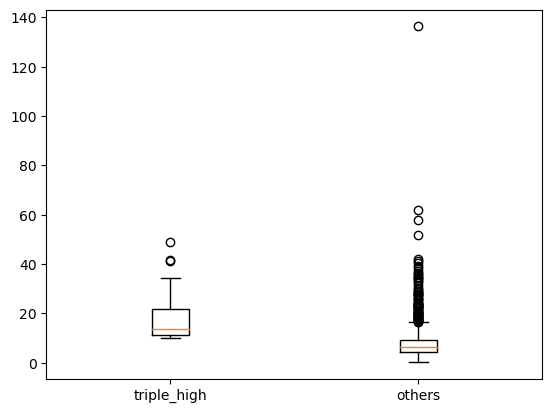

In [196]:
import seaborn as sns
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
x1 = triple_high["CGAS"]
print(len(x1))
x2 = others["CGAS"]
print(len(x2))
ax.boxplot([x1, x2], labels=['triple_high', 'others'])


47
1064


(0.0, 50.0)

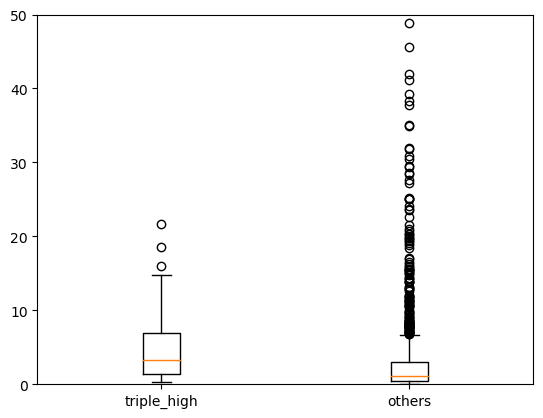

In [200]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
x1 = triple_high["IL6"]
print(len(x1))
x2 = others["IL6"]
print(len(x2))
ax.boxplot([x1, x2], labels=['triple_high', 'others'])
ax.set_ylim(0, 50)

47
1064


{'whiskers': [<matplotlib.lines.Line2D at 0x7f9614a978b0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f9614a97df0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f9614a97610>,
 'medians': [<matplotlib.lines.Line2D at 0x7f9614ab8250>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f9614ab84f0>,
 'means': []}

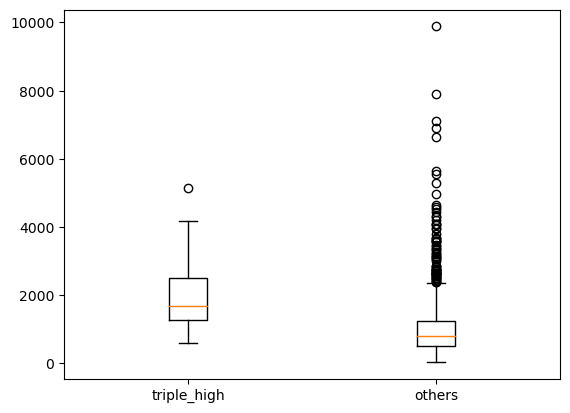

In [202]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
x1 = triple_high["HLA-A"]
print(len(x1))
x2 = others["HLA-A"]
print(len(x2))
ax.boxplot([x1, x2], labels=['triple_high', 'others'])


47
1064


{'whiskers': [<matplotlib.lines.Line2D at 0x7f9614a24100>,
 'caps': [<matplotlib.lines.Line2D at 0x7f9614a26740>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f9614a27370>,
 'medians': [<matplotlib.lines.Line2D at 0x7f9614a26e30>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f9614a25210>,
 'means': []}

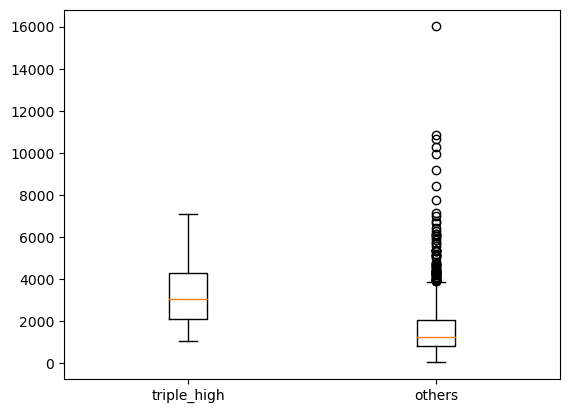

In [203]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
x1 = triple_high["HLA-B"]
print(len(x1))
x2 = others["HLA-B"]
print(len(x2))
ax.boxplot([x1, x2], labels=['triple_high', 'others'])

47
1064


{'whiskers': [<matplotlib.lines.Line2D at 0x7f961493c520>,
 'caps': [<matplotlib.lines.Line2D at 0x7f961493ca60>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f961493c280>,
 'medians': [<matplotlib.lines.Line2D at 0x7f961493cfa0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f961493d240>,
 'means': []}

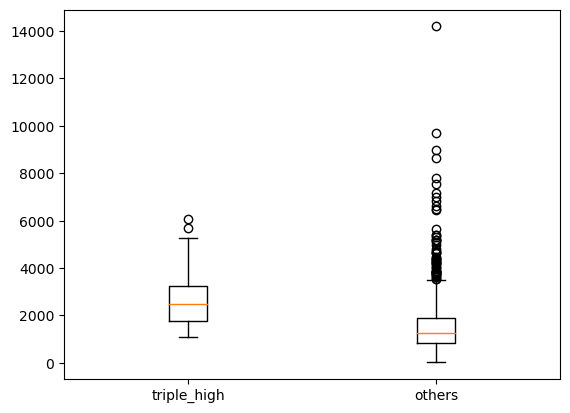

In [204]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
x1 = triple_high["HLA-C"]
print(len(x1))
x2 = others["HLA-C"]
print(len(x2))
ax.boxplot([x1, x2], labels=['triple_high', 'others'])

47
1064


{'whiskers': [<matplotlib.lines.Line2D at 0x7f96149a1b70>,
 'caps': [<matplotlib.lines.Line2D at 0x7f96149a20b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f96149a18d0>,
 'medians': [<matplotlib.lines.Line2D at 0x7f96149a25f0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f96149a2890>,
 'means': []}

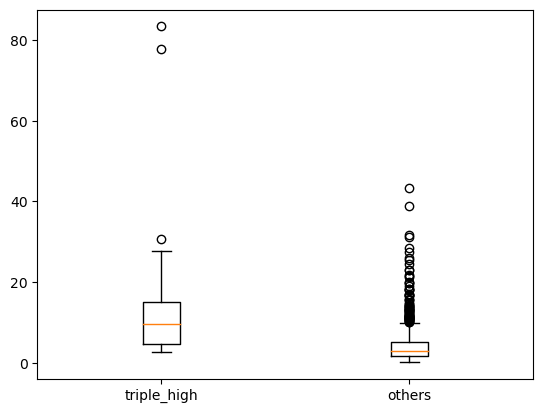

In [205]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
x1 = triple_high["CD274"]
print(len(x1))
x2 = others["CD274"]
print(len(x2))
ax.boxplot([x1, x2], labels=['triple_high', 'others'])

In [207]:
# clinical dataのimport
clinical = pd.read_table("./clinical.tsv", sep="\t")

In [232]:
triple_high_list = list(triple_high["Case ID"])
print(len(triple_high_list))
clinical["triplehigh"] = clinical["case_submitter_id"].apply(lambda x: 1 if x in triple_high_list else 0)

In [237]:
clinical[clinical["triplehigh"]==0]


,case_id,case_submitter_id,project_id,age_at_index,age_is_obfuscated,cause_of_death,cause_of_death_source,country_of_residence_at_enrollment,days_to_birth,days_to_death,...,treatment_dose,treatment_dose_units,treatment_effect,treatment_effect_indicator,treatment_frequency,treatment_intent_type,treatment_or_therapy,treatment_outcome,treatment_type,triplehigh
0,001cef41-ff86-4d3f-a140-a647ac4b10a1,TCGA-E2-A1IU,TCGA-BRCA,60,'--,'--,'--,'--,-22279,'--,...,'--,'--,'--,'--,'--,'--,no,'--,"Radiation Therapy, NOS",0
1,001cef41-ff86-4d3f-a140-a647ac4b10a1,TCGA-E2-A1IU,TCGA-BRCA,60,'--,'--,'--,'--,-22279,'--,...,'--,'--,'--,'--,'--,'--,yes,'--,"Pharmaceutical Therapy, NOS",0
2,0045349c-69d9-4306-a403-c9c1fa836644,TCGA-A1-A0SB,TCGA-BRCA,70,'--,'--,'--,'--,-25833,'--,...,'--,'--,'--,'--,'--,'--,not reported,'--,"Radiation Therapy, NOS",0
3,0045349c-69d9-4306-a403-c9c1fa836644,TCGA-A1-A0SB,TCGA-BRCA,70,'--,'--,'--,'--,-25833,'--,...,'--,'--,'--,'--,'--,'--,not reported,'--,"Pharmaceutical Therapy, NOS",0
4,00807dae-9f4a-4fd1-aac2-82eb11bf2afb,TCGA-A2-A04W,TCGA-BRCA,50,'--,'--,'--,'--,-18345,'--,...,'--,'--,'--,'--,'--,'--,no,'--,"Radiation Therapy, NOS",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2184,fe7f74b8-20f4-4471-91dc-4cca8c68e5c0,TCGA-A2-A3XZ,TCGA-BRCA,46,'--,'--,'--,'--,-16978,'--,...,'--,'--,'--,'--,'--,'--,no,'--,"Radiation Therapy, NOS",0
2185,fec0da58-1047-44d2-b6d1-c18cceed43dc,TCGA-E9-A295,TCGA-BRCA,71,'--,'--,'--,'--,-25957,'--,...,'--,'--,'--,'--,'--,'--,yes,'--,"Radiation Therapy, NOS",0
2186,fec0da58-1047-44d2-b6d1-c18cceed43dc,TCGA-E9-A295,TCGA-BRCA,71,'--,'--,'--,'--,-25957,'--,...,'--,'--,'--,'--,'--,'--,yes,'--,"Pharmaceutical Therapy, NOS",0
2187,ff0f875f-113a-4c0f-8c0a-4259cd496e6d,TCGA-C8-A26W,TCGA-BRCA,58,'--,'--,'--,'--,-21391,'--,...,'--,'--,'--,'--,'--,'--,no,'--,"Radiation Therapy, NOS",0


In [241]:
clinical_KM = clinical.loc[:,["days_to_death", "days_to_last_follow_up", "vital_status", "triplehigh"]]

In [243]:
clinical_KM.to_csv("TCGA_BRCA_KM.csv")

In [221]:
clinical_others = clinical[~(clinical["case_submitter_id"].isin(triple_high_list))]
clinical_others.shape

(2095, 158)

In [253]:
KM_df = pd.read_csv("./TCGA_BRCA_KM_made.csv", index_col=0)
KM_df

,days_to_death,triplehigh,cens
356,1,0,0
1768,1,0,0
2054,1,0,1
6,5,0,0
1464,5,0,0
...,...,...,...
82,7777,0,0
276,8008,0,0
74,8391,0,0
232,8556,0,0


In [259]:
from lifelines.datasets import load_gbsg2
from lifelines import KaplanMeierFitter
from lifelines.statistics import logrank_test

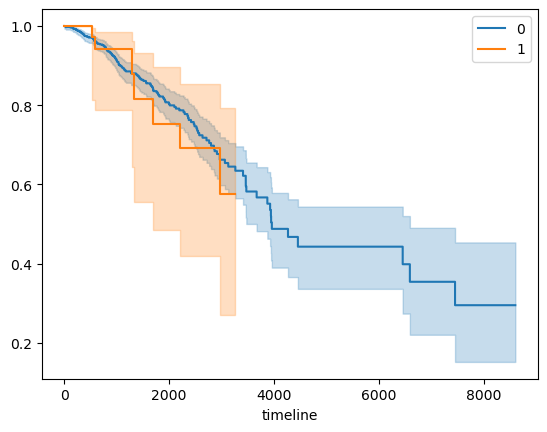

In [255]:
for name, group in KM_df.groupby('triplehigh'):
    kmf = KaplanMeierFitter()
    kmf.fit(group['days_to_death'], event_observed=group['cens'],label=name)
    kmf.plot()

In [262]:
data_A = KM_df[KM_df["triplehigh"]==1]
data_B = KM_df[KM_df["triplehigh"]==0]

results = logrank_test(data_A["days_to_death"], data_B['days_to_death'], data_A["cens"], data_B["cens"])

In [263]:
results.print_summary()

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           0.10 0.75      0.41